[51504.09575568]
[ 0.35585664  0.34831748  6.33121115  0.88841575  0.80100517 95.91727812
 29.03885488] 51504.0957556845
[54587.38728602]
[  0.74367866   0.54234274   5.10396902   0.63512705   0.78611176
 103.48164425  33.78682217] 54587.387286020305
[62338.96097046]
[  1.63616301   0.98135167   2.28791931   0.86773282   0.56558004
 109.99703371  85.82771135] 60732.896270891586
[52511.86579691]
[ 0.145723    0.6274537   6.18567926  0.65123192  0.74173216 89.47101638
 38.07915268] 52511.8657969083
[51994.85511089]
[  0.39027751   1.99304686   2.78949606   0.88301062   0.16341836
  28.0474244  156.92950802] 51994.855110889584
[58182.85836457]
[  1.27197445   0.58933177   3.89171328   0.75384627   0.73883645
 116.75362436  44.72126805] 58182.8583645702
[48689.96323693]
[2.37753244e-02 9.21402953e-01 5.82303774e+00 9.99922335e-01
 4.69930856e-01 5.77136028e+01 8.01051013e+01] 48689.963236926
[54874.78186189]
[ 0.56582965  1.09750227  4.2614847   0.83043288  0.48620078 65.49523539
 86.31573

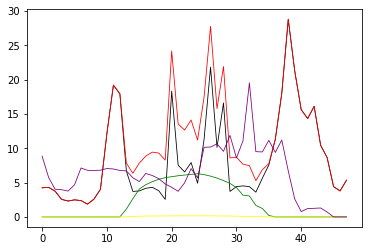

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 28 16:37:49 2021

@author: dell
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Oct 22 12:11:40 2021

@author: dell
"""

import numpy as np
from sko.GA import GA
import matplotlib.pyplot as plt

K = np.zeros(7)  #光伏功率、光热功率、风力功率、光热储能比、蓄电池用电比、蓄电池容量、热盐容量
P_solar = np.zeros(48)
P_CPS = np.zeros(48)
P_T = np.zeros(48)
P_CPSbattery = np.zeros(48)
P_wind = np.zeros(48)
P_battery = np.zeros(48)
P_demand = np.zeros(48)   #需求量
P_solar_sum = 0#白天光伏发电
P_CPS_sum = 0 #白天光热发电
P_wind_sum = 0
P_battery_in = 0
P_CPSbattery_in=0
P_battery_out = 0
P_CPSbattery_out=0


P_demand = [4.235, 4.305, 3.745, 2.555, 2.31, 2.485, 2.38, 1.855, 2.59, 4.025, 12.18, 19.18, 17.92, 6.685, 3.71, 3.78, 4.165, 4.305, 3.815, 2.555, 18.305, 7.525, 6.545, 7.91, 4.9, 11.27, 21.805, 10.115, 16.59, 3.71, 4.41, 4.515, 4.41, 3.605, 5.635, 7.56, 11.305, 17.99, 28.77, 21.245, 15.61, 14.315, 16.1, 10.43, 8.645, 4.41, 3.78, 5.355]
wind = [1.517, 0.983, 0.692, 0.68, 0.646, 0.804, 1.224, 1.164, 1.161, 1.167, 1.210, 1.198, 1.161, 1.151, 0.98, 0.883, 1.087, 1.035, 0.957, 0.824, 0.74, 0.64, 0.852, 1.208, 0.977, 1.740, 1.747, 1.825, 1.639, 2.038, 1.473, 1.8978, 3.352, 1.631, 1.624, 1.915, 1.611, 1.922, 1.15, 0.449, 0.134, 0.208, 0.215, 0.223, 0.123, 0, 0, 0, 0]
PV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.236, 2.865, 4.404, 5.088, 5.563, 5.949, 6.201, 6.354, 6.504, 6.615, 6.726, 6.821, 6.684, 6.441, 6.132, 5.743, 5.288, 4.644, 3.437, 3.31, 1.815, 1.332, 0.228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DSP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
###将其他变量转化为K  假设光热占比一定
def cal_func(K):
    
    for i in range(48):
        P_solar[i] = K[0]*PV[i]  #发电功率
        P_CPS[i] = K[1]*PV[i] #光热总功率
        P_T[i] = K[1]*(1-K[3])*PV[i] #光热发电功率
        P_wind[i] = K[2]*wind[i]

        P_battery[i] =  P_solar[i] + P_wind[i] + P_T[i] - P_demand[i]#双电池整体状态
        P_CPSbattery[i] =  K[1]*K[3]*PV[i] #熔盐电池充电功率

    
    
###目标函数
def real_demo_func(K):
    P_battery_in = 0
    P_CPSbattery_in=0
    P_battery_out = 0
    P_CPSbattery_out=0
    max_battery=0
    min_battery=0
    max_CSP=0
    min_CSP=0
            
    MIN = 0
    
    for i in range(48):
        if P_battery[i] < 0:
            P_battery_out += K[4]*abs(P_battery[i])
            P_CPSbattery_out += (1-K[4])*abs(P_battery[i])
        else:
            P_battery_in += P_battery[i]

        P_CPSbattery_in += P_CPSbattery[i]

        max_battery=max(max_battery,(P_battery_in-P_battery_out))#记录最高电池状态
        min_battery=min(min_battery,(P_battery_in-P_battery_out))#记录最低电池状态
        max_CSP=max(max_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最高电池状态
        min_CSP=min(min_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最低电池状态
            
    P_solar_max = max(P_solar)   #总光伏发电
    P_CPS_max = max(P_CPS)       #总光热
    P_wind_max = max(P_wind)

    
    MIN = 800*P_solar_max + 920*P_wind_max + 2000*P_CPS_max +45*(max_CSP-min_CSP) + 250* (max_battery-min_battery)  #成本
    K[5]=max_battery-min_battery
    K[6]=max_CSP-min_CSP
    return MIN

###定义寻优函数
def demo_func(K):
    P_battery_in = 0
    P_CPSbattery_in=0
    P_battery_out = 0
    P_CPSbattery_out=0
    max_battery=0
    min_battery=0
    max_CSP=0
    min_CSP=0
    MIN = 0
    con1 = 0
    con2 = 0
    con3 = 0
    cal_func(K)
            
    for i in range(48):
        if P_battery[i] < 0:
            P_battery_out += K[4]*abs(P_battery[i])
            P_CPSbattery_out += (1-K[4])*abs(P_battery[i])
        else:
            P_battery_in += P_battery[i]

        P_CPSbattery_in += P_CPSbattery[i]

        max_battery=max(max_battery,(P_battery_in-P_battery_out))#记录最高电池状态
        min_battery=min(min_battery,(P_battery_in-P_battery_out))#记录最低电池状态
        max_CSP=max(max_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最高电池状态
        min_CSP=min(min_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最低电池状态
    
    P_solar_sum = sum(P_solar)   #总光伏发电
    P_CPS_sum = sum(P_CPS)       #总光热发电
    P_wind_sum = sum(P_wind)
    P_demand_sum = sum(P_demand)
    
            
    P_solar_max = max(P_solar)   #总光伏发电
    P_CPS_max = max(P_CPS)       #总光热发电
    P_wind_max = max(P_wind)
    P_demand_sum = sum(P_demand)
    
    MIN = 800*P_solar_max + 920*P_wind_max + 2000*P_CPS_max +45*(max_CSP-min_CSP) + 250* (max_battery-min_battery)  #成本
    

    if P_battery_in-P<battery_out:
        con1 += 10000*abs(P_battery_in-P_battery_out)
    if P_CPSbattery_in<P_CPSbattery_out:
        con2 += 10000*abs(P_CPSbattery_in-P_CPSbattery_out)
    for i in range(48):  #保证每时刻满足供应需求
        a = P_T[i] + P_solar[i] + P_wind[i] - P_battery[i] 
        if a < P_demand[i]:
            con3 += 100000*abs(a-P_demand[i])
        
    cons = MIN + con1 + con2 + con3 
    return cons

###设置初始值
best_cons = np.inf    
K = [2, 0.5, 3, 0.2, 0.5, 30, 50]
best_K = np.zeros(4)

###多次寻优求最小值
for i in range(20):
    ga = GA(func=demo_func, n_dim = 5,size_pop = 200, max_iter = 200,prob_mut = 0.001, lb = [0]*7, ub = [10, 10, 10, 1, 1, 1, 1])
    K, cons = ga.run()
    print(cons)
    real_y = real_demo_func(K)
    print(K,real_y)
    if cons < best_cons:
        best_K = K
        y = real_y
        best_cons = cons
print('Final parameters are :',best_K)
print('Final result is :',y)

cal_func(best_K)
P_real = np.zeros(48)
for i in range(48):
    P_real[i] = P_CPS[i] + P_solar[i] + P_wind[i] - P_battery[i]

#画图
x = range(0, len(P_real))

plt.plot(x, P_demand, color='black', label='Demand', linewidth=0.8)

plt.plot(x, P_real, color='red', label='Put Out', linewidth=0.8)

plt.plot(x, P_CPS, color='green', label='CSP', linewidth=0.8)


plt.plot(x, P_solar, color='yellow', label='solar', linewidth=0.8)

plt.plot(x, P_wind, color='purple', label='wind', linewidth=0.8)





[58277.3577022]
[  1.46311053   0.76184474   3.12739837   0.9483065    0.60390679
 106.04103616  72.05672321] 57774.19532313622
[59780.75401041]
[  0.67020812   1.98617654   2.6414592    0.94927954   0.19001974
  34.81144988 175.48356376] 55498.072328648064
[52314.90309953]
[8.06193954e-01 2.13430369e+00 1.61898786e+00 9.99992132e-01
 9.55769477e-02 2.06535932e+01 1.90470967e+02] 52242.701432158494
[59014.15636057]
[  1.34651103   1.5075218    1.83455156   0.99486655   0.30394371
  63.61700212 144.53452396] 55979.021434094386
[53236.92447031]
[7.14126086e-01 2.36303070e+00 1.32989817e+00 9.86145019e-01
 6.12138546e-02 1.36812986e+01 2.03752515e+02] 52823.68911831664
[55209.54495397]
[  1.06664241   1.39944674   2.61878016   0.97017664   0.32093342
  59.58154231 129.42156672] 53706.96176151055
[53688.086349]
[  1.11680032   1.54034213   2.21580477   0.99940264   0.26294865
  51.95837488 145.94410044] 53497.768986225565
[55328.52652961]
[  1.2890076    1.16800175   2.63793172   0.9897335

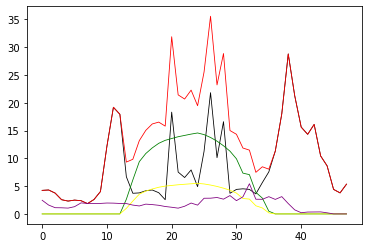

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 28 16:37:49 2021

@author: dell
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Oct 22 12:11:40 2021

@author: dell
"""

import numpy as np
from sko.GA import GA
import matplotlib.pyplot as plt

K = np.zeros(7)  #光伏功率、光热功率、风力功率、光热储能比、蓄电池用电比、蓄电池容量、热盐容量
P_solar = np.zeros(48)
P_CPS = np.zeros(48)
P_T = np.zeros(48)
P_CPSbattery = np.zeros(48)
P_wind = np.zeros(48)
P_battery = np.zeros(48)
P_demand = np.zeros(48)   #需求量
P_solar_sum = 0#白天光伏发电
P_CPS_sum = 0 #白天光热发电
P_wind_sum = 0
P_battery_in = 0
P_CPSbattery_in=0
P_battery_out = 0
P_CPSbattery_out=0


P_demand = [4.235, 4.305, 3.745, 2.555, 2.31, 2.485, 2.38, 1.855, 2.59, 4.025, 12.18, 19.18, 17.92, 6.685, 3.71, 3.78, 4.165, 4.305, 3.815, 2.555, 18.305, 7.525, 6.545, 7.91, 4.9, 11.27, 21.805, 10.115, 16.59, 3.71, 4.41, 4.515, 4.41, 3.605, 5.635, 7.56, 11.305, 17.99, 28.77, 21.245, 15.61, 14.315, 16.1, 10.43, 8.645, 4.41, 3.78, 5.355]
wind = [1.517, 0.983, 0.692, 0.68, 0.646, 0.804, 1.224, 1.164, 1.161, 1.167, 1.210, 1.198, 1.161, 1.151, 0.98, 0.883, 1.087, 1.035, 0.957, 0.824, 0.74, 0.64, 0.852, 1.208, 0.977, 1.740, 1.747, 1.825, 1.639, 2.038, 1.473, 1.8978, 3.352, 1.631, 1.624, 1.915, 1.611, 1.922, 1.15, 0.449, 0.134, 0.208, 0.215, 0.223, 0.123, 0, 0, 0, 0]
PV = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.236, 2.865, 4.404, 5.088, 5.563, 5.949, 6.201, 6.354, 6.504, 6.615, 6.726, 6.821, 6.684, 6.441, 6.132, 5.743, 5.288, 4.644, 3.437, 3.31, 1.815, 1.332, 0.228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DSP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
###将其他变量转化为K  假设光热占比一定
def cal_func(K):
    
    for i in range(48):
        P_solar[i] = K[0]*PV[i]  #发电功率
        P_CPS[i] = K[1]*PV[i] #光热总功率
        P_T[i] = K[1]*(1-K[3])*PV[i] #光热发电功率
        P_wind[i] = K[2]*wind[i]

        P_battery[i] =  P_solar[i] + P_wind[i] + P_T[i] - P_demand[i]#双电池整体状态
        P_CPSbattery[i] =  K[1]*K[3]*PV[i] #熔盐电池充电功率

    
    
###目标函数
def real_demo_func(K):
    P_battery_in = 0
    P_CPSbattery_in=0
    P_battery_out = 0
    P_CPSbattery_out=0
    max_battery=0
    min_battery=0
    max_CSP=0
    min_CSP=0
            
    MIN = 0
    
    for i in range(48):
        if P_battery[i] < 0:
            P_battery_out += K[4]*abs(P_battery[i])
            P_CPSbattery_out += (1-K[4])*abs(P_battery[i])
        else:
            P_battery_in += P_battery[i]

        P_CPSbattery_in += P_CPSbattery[i]

        max_battery=max(max_battery,(P_battery_in-P_battery_out))#记录最高电池状态
        min_battery=min(min_battery,(P_battery_in-P_battery_out))#记录最低电池状态
        max_CSP=max(max_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最高电池状态
        min_CSP=min(min_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最低电池状态
            
    P_solar_max = max(P_solar)   #总光伏发电
    P_CPS_max = max(P_CPS)       #总光热
    P_wind_max = max(P_wind)

    
    MIN = 800*P_solar_max + 920*P_wind_max + 2000*P_CPS_max +45*(max_CSP-min_CSP) + 250* (max_battery-min_battery)  #成本
    K[5]=max_battery-min_battery
    K[6]=max_CSP-min_CSP
    return MIN

###定义寻优函数
def demo_func(K):
    P_battery_in = 0
    P_CPSbattery_in=0
    P_battery_out = 0
    P_CPSbattery_out=0
    max_battery=0
    min_battery=0
    max_CSP=0
    min_CSP=0
    MIN = 0
    con1 = 0
    con2 = 0
    con3 = 0
    cal_func(K)
            
    for i in range(48):
        if P_battery[i] < 0:
            P_battery_out += K[4]*abs(P_battery[i])
            P_CPSbattery_out += (1-K[4])*abs(P_battery[i])
        else:
            P_battery_in += P_battery[i]

        P_CPSbattery_in += P_CPSbattery[i]

        max_battery=max(max_battery,(P_battery_in-P_battery_out))#记录最高电池状态
        min_battery=min(min_battery,(P_battery_in-P_battery_out))#记录最低电池状态
        max_CSP=max(max_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最高电池状态
        min_CSP=min(min_CSP,(P_CPSbattery_in-P_CPSbattery_out))#记录最低电池状态
    
    P_solar_sum = sum(P_solar)   #总光伏发电
    P_CPS_sum = sum(P_CPS)       #总光热发电
    P_wind_sum = sum(P_wind)
    P_demand_sum = sum(P_demand)
    
            
    P_solar_max = max(P_solar)   #总光伏发电
    P_CPS_max = max(P_CPS)       #总光热发电
    P_wind_max = max(P_wind)
    P_demand_sum = sum(P_demand)
    
    MIN = 800*P_solar_max + 920*P_wind_max + 2000*P_CPS_max +45*(max_CSP-min_CSP) + 250* (max_battery-min_battery)  #成本
    

    if P_battery_in<P_battery_out:
        con1 += 10000*abs(P_battery_in-P_battery_out)
    if P_CPSbattery_in<P_CPSbattery_out:
        con2 += 10000*abs(P_CPSbattery_in-P_CPSbattery_out)
    for i in range(48):  #保证每时刻满足供应需求
        a = P_T[i] + P_solar[i] + P_wind[i] - P_battery[i] 
        if a < P_demand[i]:
            con3 += 100000*abs(a-P_demand[i])
        
    cons = MIN + con1 + con2 + con3+1000*abs(P_solar_max-P_wind_max)
    return cons

###设置初始值
best_cons = np.inf    
K = [2, 0.5, 3, 0.2, 0.5, 5, 10]
best_K = np.zeros(4)

###多次寻优求最小值
for i in range(20):
    ga = GA(func=demo_func, n_dim = 7,size_pop = 200, max_iter = 200,prob_mut = 0.001, lb = [0]*7, ub = [10, 10, 10, 1, 1, 1, 1])
    K, cons = ga.run()
    print(cons)
    real_y = real_demo_func(K)
    print(K,real_y)
    if cons < best_cons:
        best_K = K
        y = real_y
        best_cons = cons
print('Final parameters are :',best_K)
print('Final result is :',y)


cal_func(best_K)
P_real = np.zeros(48)
for i in range(48):
    P_real[i] = P_CPS[i] + P_solar[i] + P_wind[i] - P_battery[i]

#画图
x = range(0, len(P_real))

plt.plot(x, P_demand, color='black', label='Demand', linewidth=0.8)

plt.plot(x, P_real, color='red', label='Put Out', linewidth=0.8)

plt.plot(x, P_CPS, color='green', label='CSP', linewidth=0.8)


plt.plot(x, P_solar, color='yellow', label='solar', linewidth=0.8)

plt.plot(x, P_wind, color='purple', label='wind', linewidth=0.8)



